<a href="https://colab.research.google.com/github/simionattovini/hydraulic-machines/blob/main/Test%20Solutions/MHA_P2_2s2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Hidráulicas A - P2 - 2s2024

## Enunciado

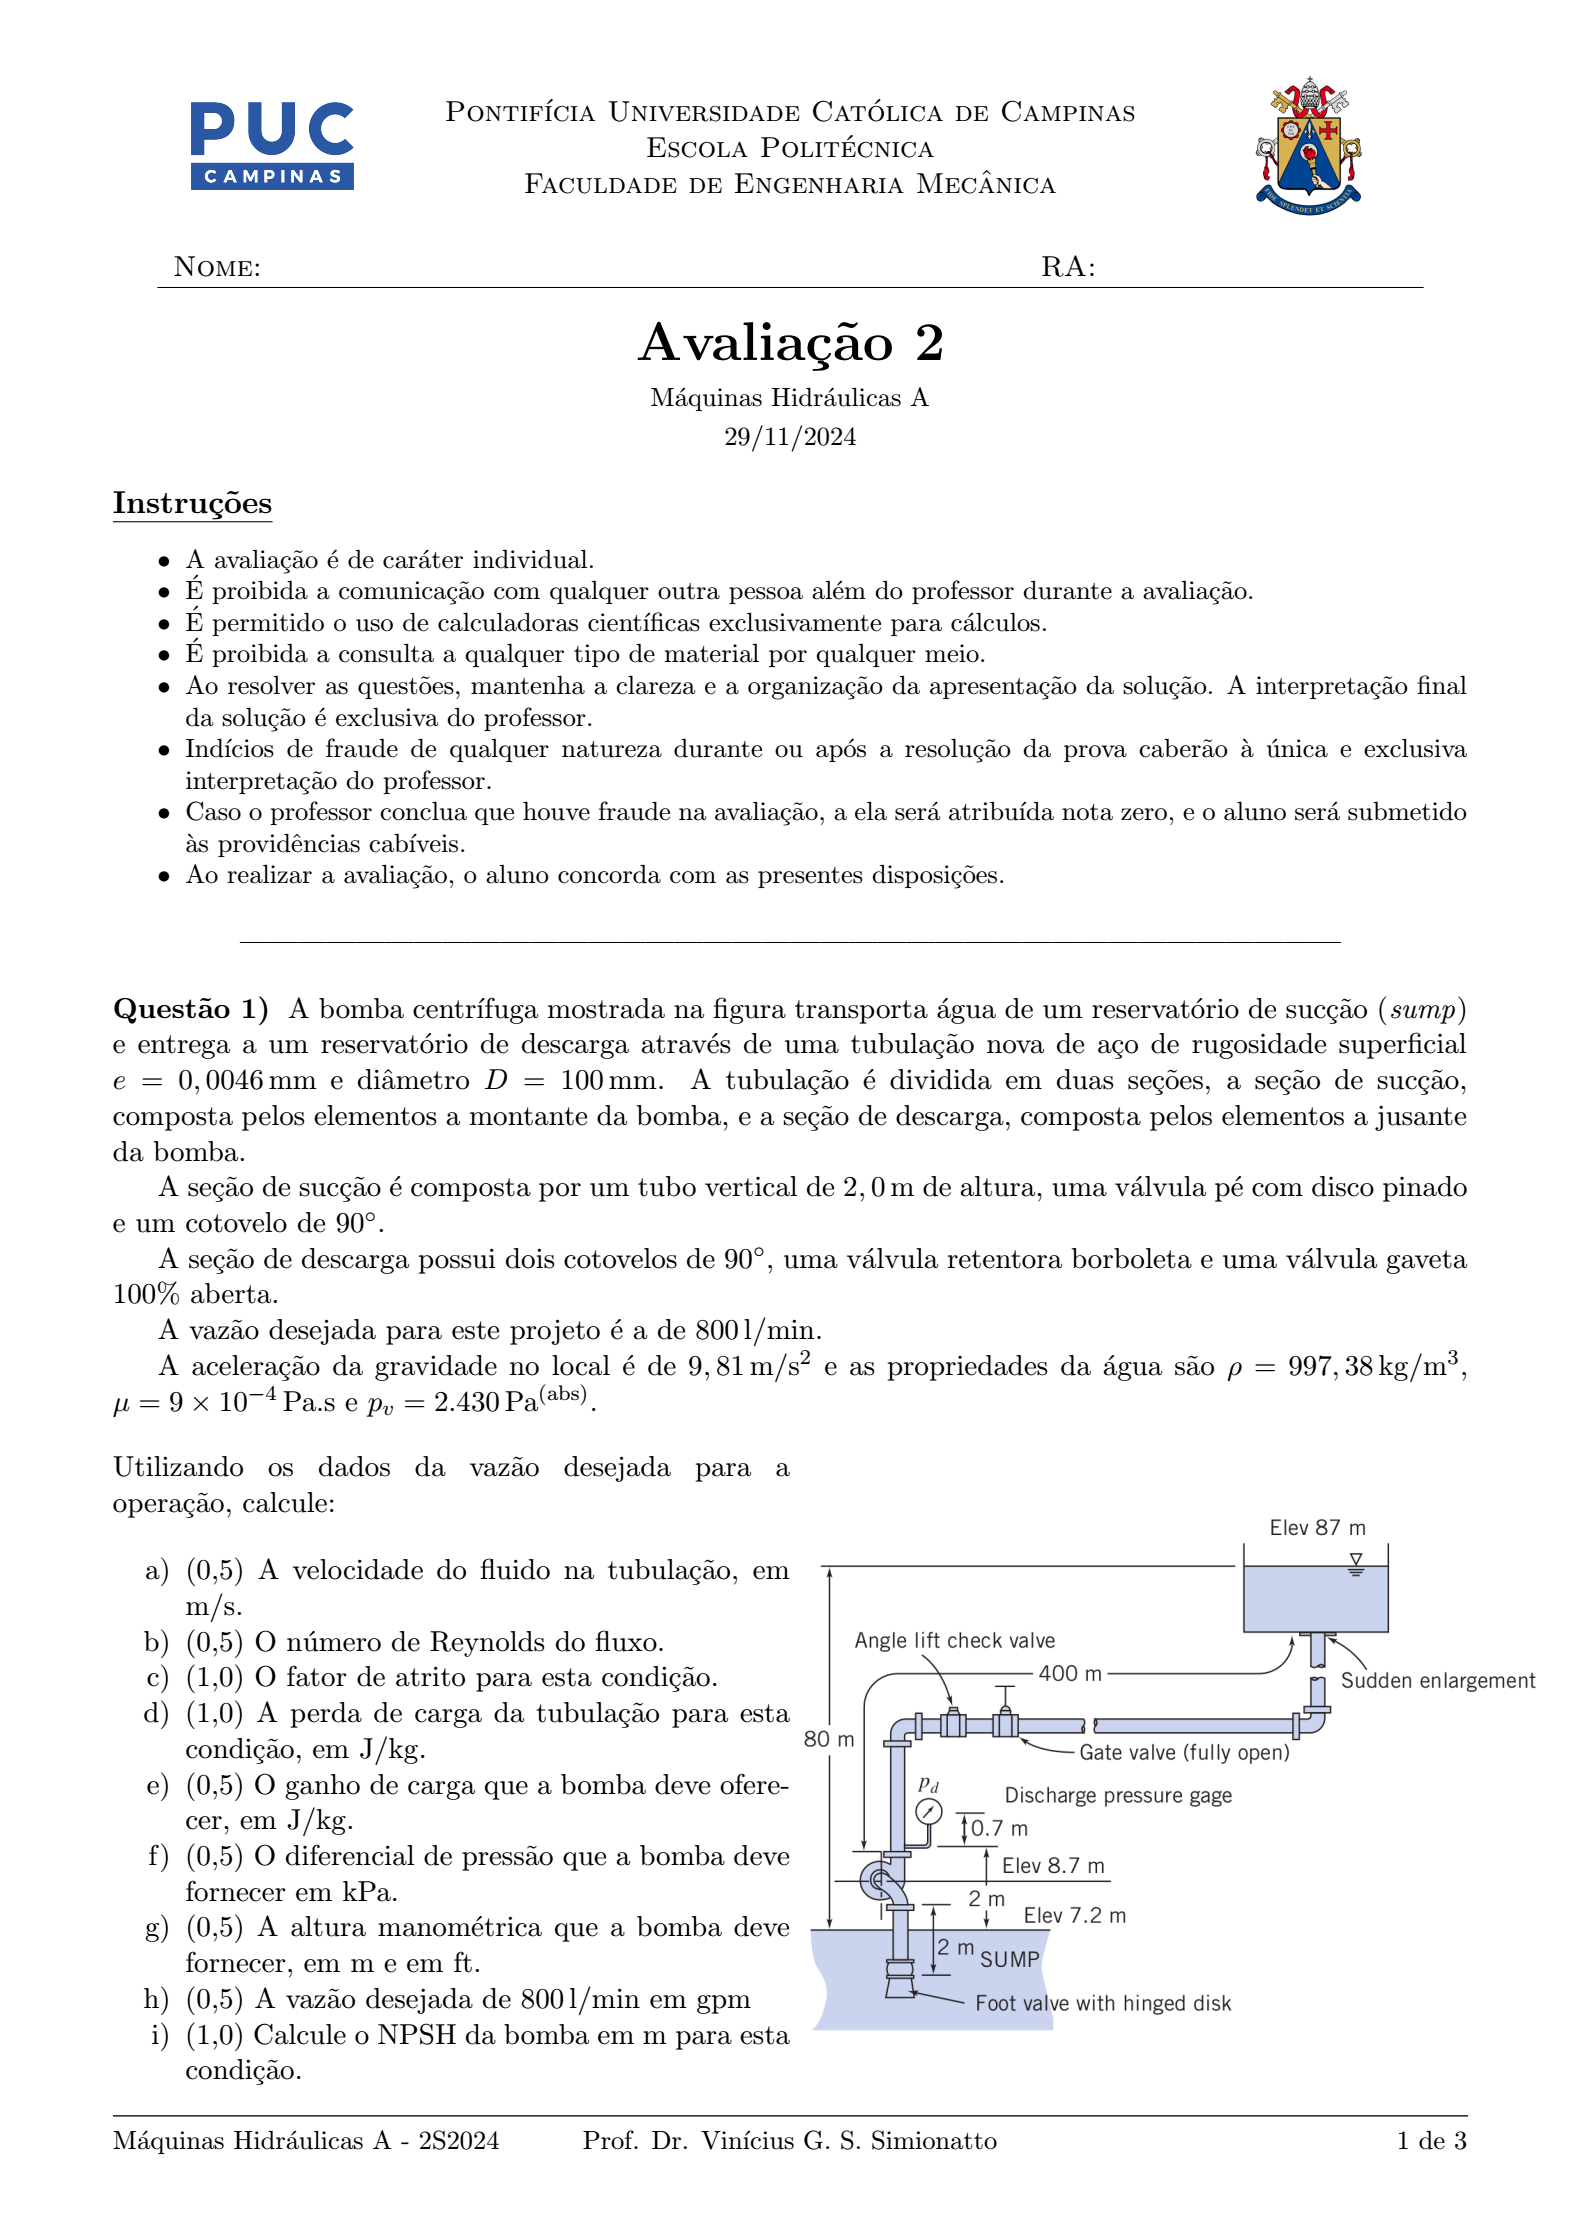

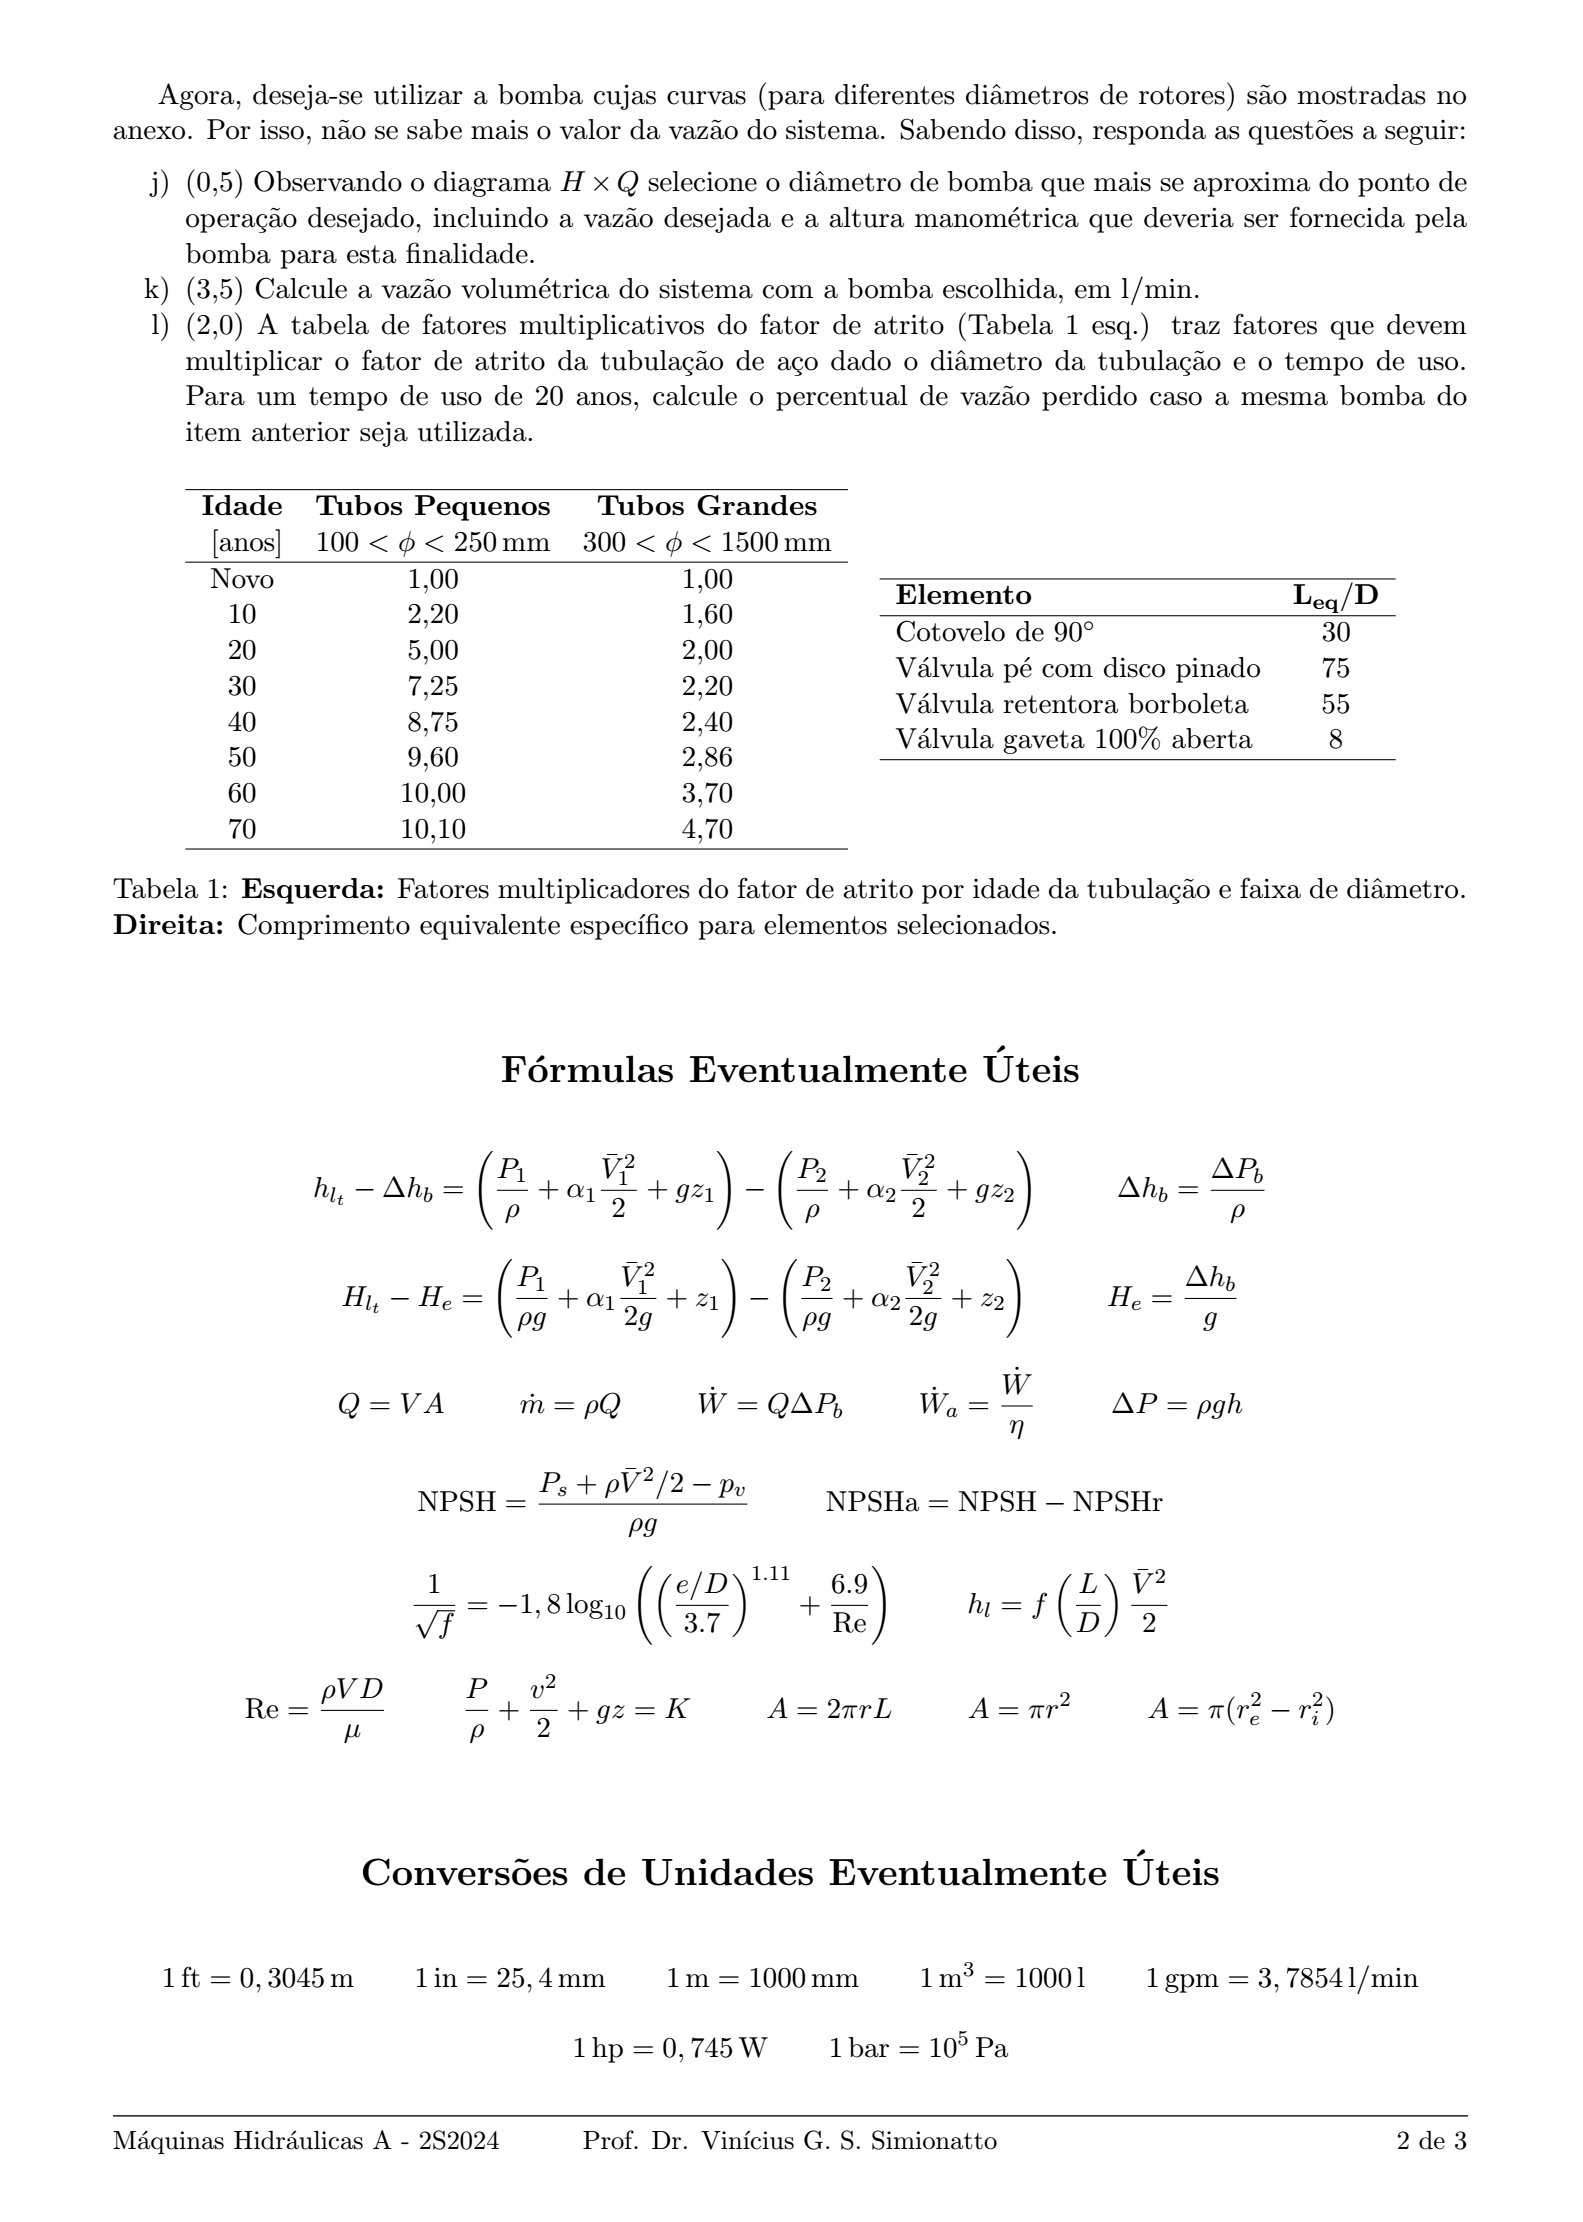

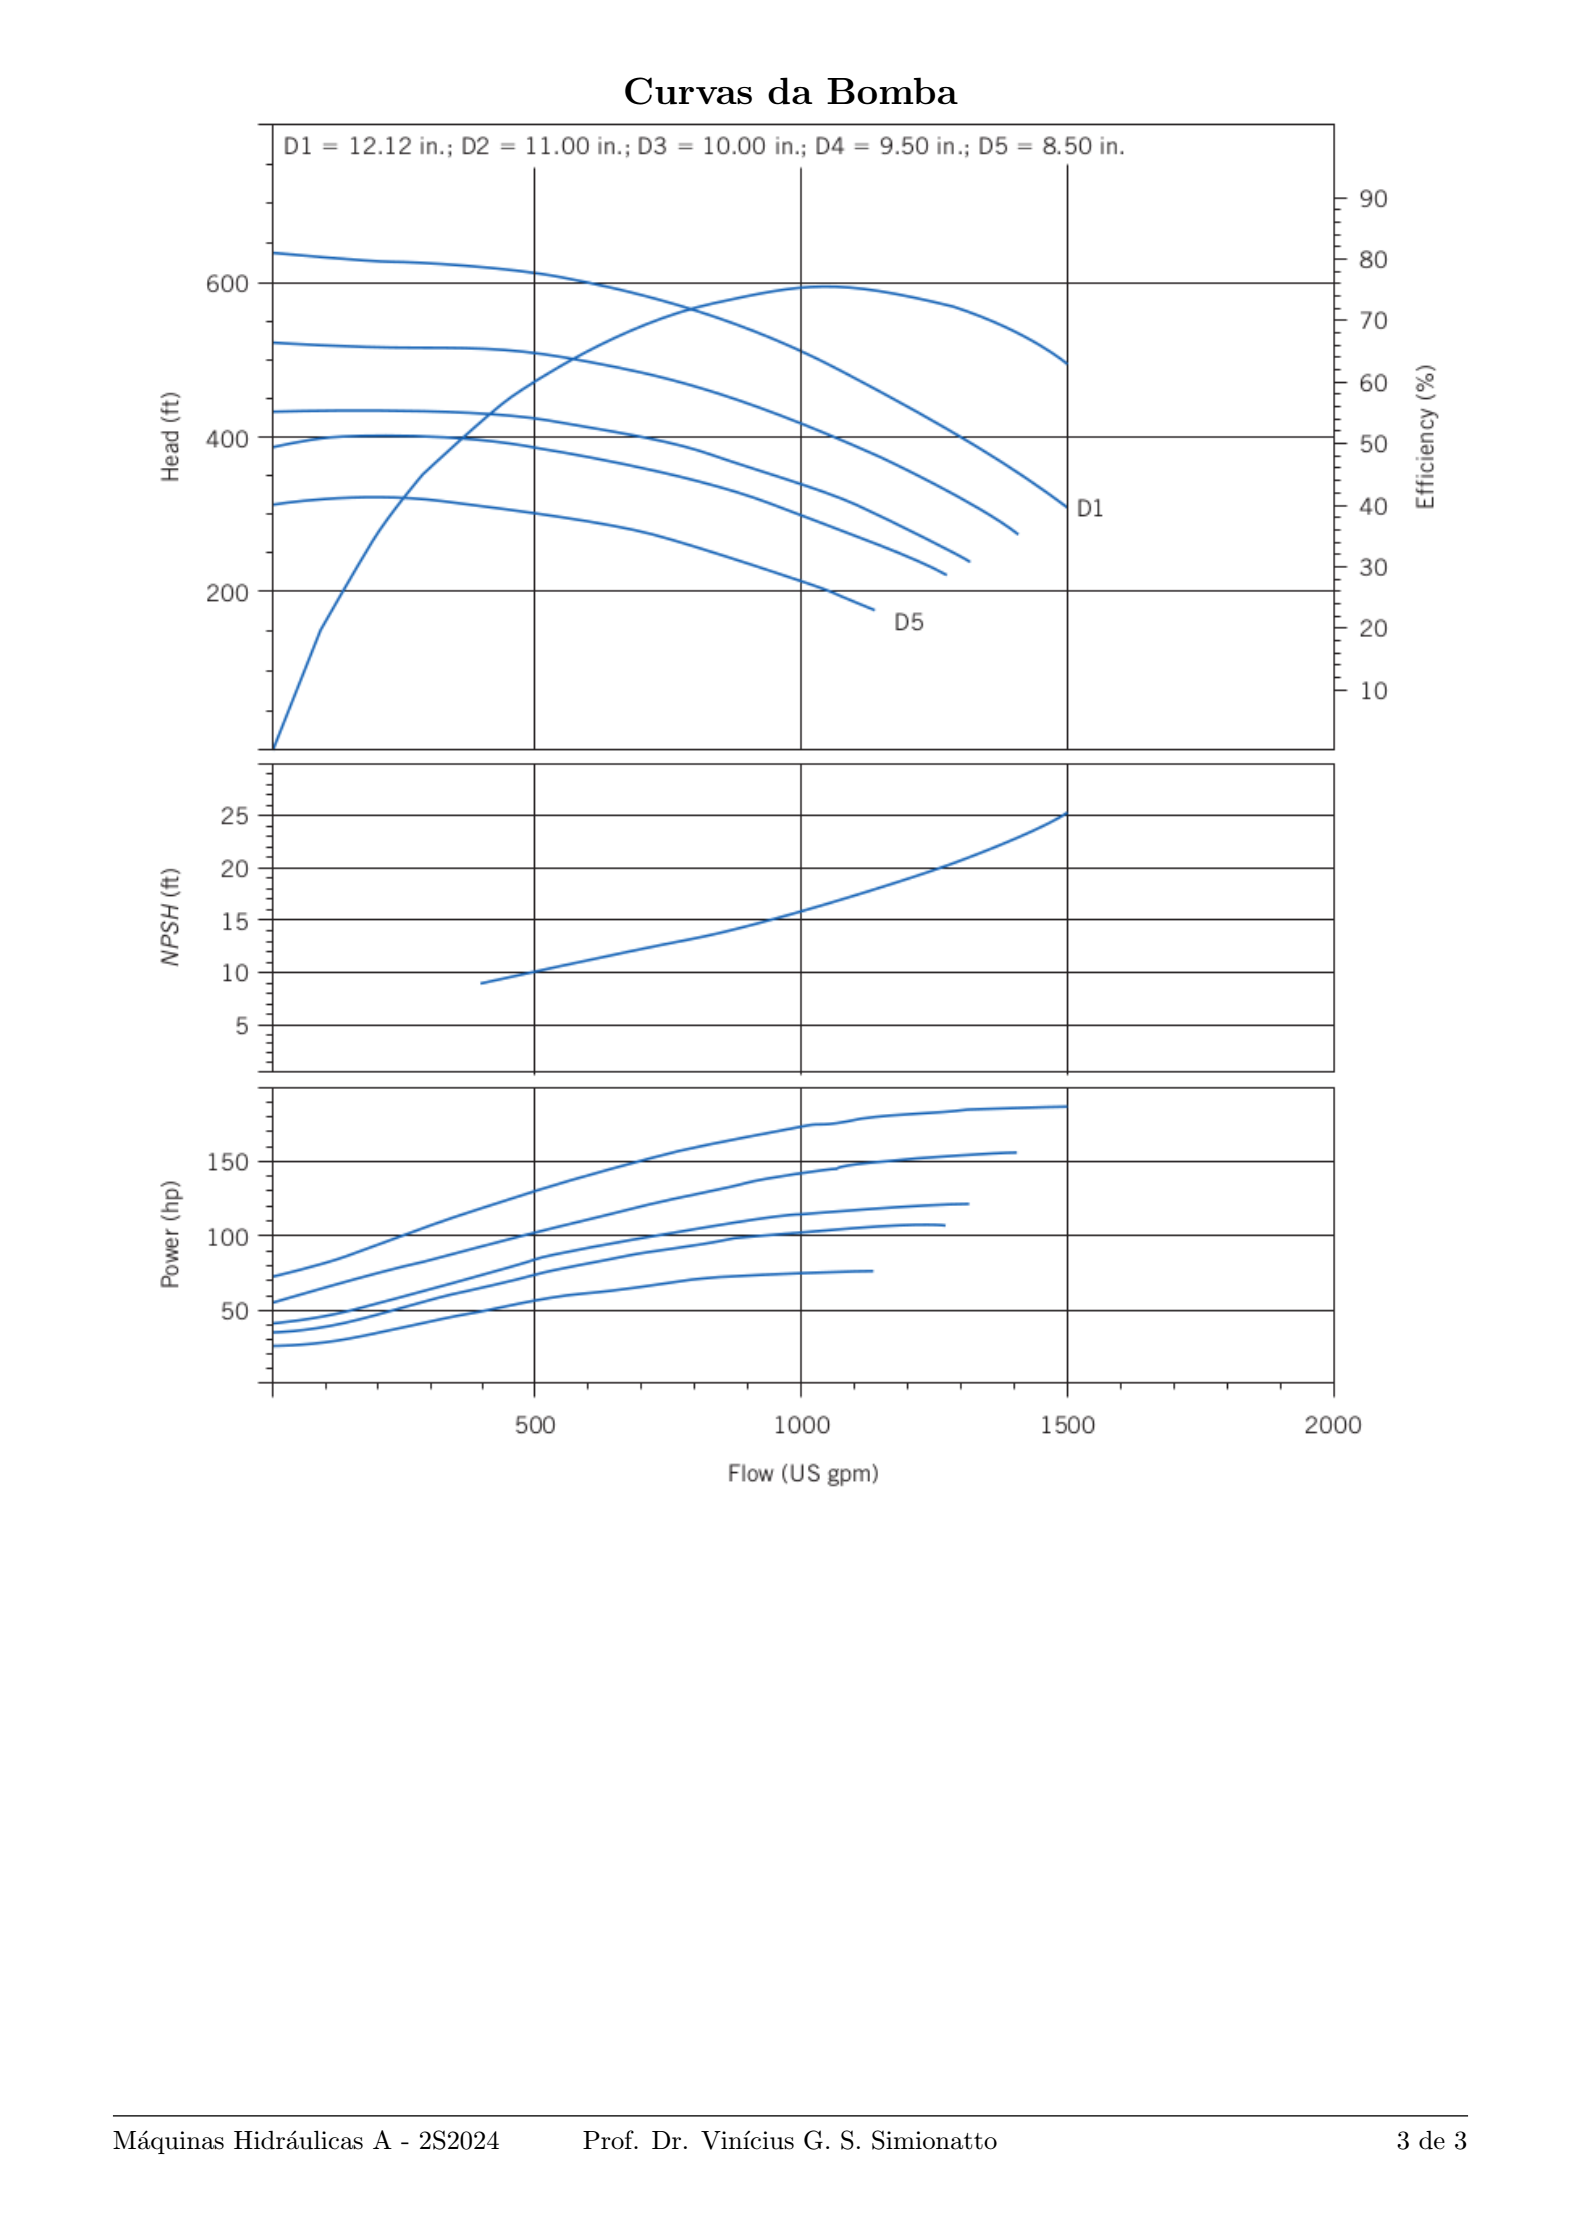

## Solução

### Questão 1 a)

Para calcular a velocidade na tubulação para a vazão fornecida, basta utilizar:

$$
V = \frac{Q}{A} = 1,6977\,\mathrm{m/s}
$$

In [26]:
from numpy import pi

Q = 800*(1/60/1000)  # l/min -> m³/s
D = 0.1  # m
A = pi*D**2/4

V = Q/A

print(f'V = {V:.4f} m/s')

V = 1.6977 m/s


### Questão 1 b)

O número de Reynolds é dado por:

$$
\mathrm{Re} = \frac{\rho V D}{\mu} = 188.133,88
$$


In [27]:
rho = 997.38  # kg/m³
mu = 9e-4     # Pa.s

Re = rho*V*D/mu

print(f'O Número de Reynolds é Re = {Re:.2f}')

O Número de Reynolds é Re = 188133.88


### Questão 1 c)

O fator de atrito é calculado pela aproximação de Haaland, válida para $Re > 10.000$:

$$
\frac{1}{\sqrt{f}} = -1,8\log_{10}\left(\left(\frac{e/D}{3,7}\right)^{1,11}+\frac{6,9}{\mathrm{Re}}\right)
$$

Assim:

$$
f \approx 0,0185
$$

In [28]:
from numpy import log10

e = 0.046e-3  # m
f = (-1.8*log10((e/D/3.7)**1.11+6.9/Re))**(-2)

print(f'O fator de atrito é f = {f:.4f}')

O fator de atrito é f = 0.0185


### Questão 1 d)

A perda de carga da tubulação é composta por:
- 1 Válvula pé com disco pinado ($h_1$)
- 3 Cotovelos de 90° ($h_2$)
- 1 Válvula retentora borboleta ($h_3$)
- 1 Válvula gaveta 100% aberta ($h_4$)
- 400 metros de tubulação lisa ($h_5$)

Assim:

$$
h_{Lt} = h_1 + h_2 + h_3 + h_4 + h_5 = 112,89 \,\mathrm{J/kg}
$$

In [29]:
Leq_D1 = 75
Leq_D2 = 30
Leq_D3 = 55
Leq_D4 = 8

L = 400  # m

h1 = f*Leq_D1*V**2/2
h2 = 3*f*Leq_D2*V**2/2
h3 = f*Leq_D3*V**2/2
h4 = f*Leq_D4*V**2/2
h5 = f*(L/D)*V**2/2

hlt = h1 + h2 + h3 + h4 + h5

print(f'A perda de carga neste caso é de {hlt:.2f} J/kg')

A perda de carga neste caso é de 112.89 J/kg


### Questão 1 e)

Aplicando a equação da perda de carga, considerando como ponto 1 o nível do reservatório de sucção e como ponto 2 o nível do reservatório de descarga:

$$
\left(\frac{p_1}{\rho} + \alpha_1 \frac{\bar{V}_1^2}{2} + g z_1\right) - \left(\frac{p_2}{\rho} + \alpha_2 \frac{\bar{V}_2^2}{2} + g z_2\right) = h_{Lt} - \Delta h_b
$$

As pressões $p_1$ e  $p_2$ são as pressões atmosféricas, e as velocidades $\bar{V}_1$ e $\bar{V}_2$ são aproximadamente nulas. Tomando o nível do reservatório de sucção como referência vertical, $z_1 = 0 \,\mathrm{m}$ e $z_2 = 80\,\mathrm{m}$. Desta forma:

$$
\Delta h_b = h_{Lt} + g z_2 = 897,69\,\mathrm{J/kg}
$$

In [30]:
z2 = 80   # m
g = 9.81  # m/s²

hb = hlt + g*z2

print(f'O ganho de carga que a bomba deve fornecer é de {hb:.2f} J/kg')

O ganho de carga que a bomba deve fornecer é de 897.69 J/kg


### Questão 1 f)

Basta aplicar a equação:

$$
\Delta P_b = \rho \Delta h_b = 895,33\,\mathrm{kPa}
$$

In [31]:
Pb = rho*hb

print(f'O ganho de pressão que a bomba deve fornecer é de {Pb/1000:.2f} kPa')

O ganho de pressão que a bomba deve fornecer é de 895.33 kPa


### Questão 1 g)

A altura manométrica é dada por:

$$
H_b = \frac{\Delta hb}{g} = 91,51\,\mathrm{m} = 300,52\,\mathrm{ft}
$$

In [32]:
Hb = hb/g

print(f'A altura manométrica da bomba é de {Hb:.2f} m ou {Hb/0.3045:.2f} ft')

A altura manométrica da bomba é de 91.51 m ou 300.52 ft


### Questão 1 h)

A vazão de $800 \,\mathrm{l/min}$ equivale a:

$$
800 / 3.7854 = 211,34\,\mathrm{gpm}
$$

In [33]:
print(f'800 l/min = {800/3.7854:.2f} gpm')

800 l/min = 211.34 gpm


### Questão 1 i)

Para calcular o NPSH da bomba é necessário conhecer a pressão de estagnação na sucção da bomba, o que depende da pressão estática nesta localidade. Assim, adotando como ponto 1 o nível do reservatório de sucção, e como ponto 2 a sucção da bomba, aplica-se:

$$
\left(\frac{p_1}{\rho} + \alpha_1 \frac{\bar{V}_1^2}{2} + g z_1\right) - \left(\frac{p_s}{\rho} + \alpha_s \frac{\bar{V}_s^2}{2} + g z_s\right) = h_{Lt}^{(s)}
$$

As velocidade $\bar{V}_1$ e a elevação $z_1$ são nulas. A velocidade $\bar{V}_s$ é a velocidade o fluido na tubulação. A pressão $p_1$ é a pressão atmosférica $P_{atm}$ e a elevação $z_s$ é de $1,5\,\mathrm{m}$.

Já a perda de carga na tubulação de sucção $h_{Lt}^{(s)}$ é composta por um cotovelo de 90°, dois metros de tubulação e uma válvula pé com disco pinado. Assim, ela é dada por:

$$
h_{Lt}^{(s)} = f\left(30 + 75 + \frac{2}{0,1}\right) \frac{V^2}{2} = 3,34 \,\mathrm{J/kg}
$$

In [34]:
hlt_s = f*(Leq_D2+Leq_D1+2/0.1)*V**2/2

print(f'A perda de carga na tubulação de sucção é de {hlt_s:.2f} J/kg')

A perda de carga na tubulação de sucção é de 3.34 J/kg


Assim, admitindo $P_{atm} = 101.325 \,\mathrm{Pa}$, a pressão de sucção é dada por:

$$
p_s = P_{atm} - \alpha_s \rho \frac{\bar{V}^2}{2} - \rho g z_s - \rho h_{Lt}^{(s)} = 81.882,61\,\mathrm{Pa}
$$

In [35]:
Patm = 101325  # Pa
alpha_s = 1
zs = 1.5  # m

ps = Patm - alpha_s*rho*V**2/2 - rho*g*zs - rho*hlt_s

print(f'A pressão na sucção da bomba e de {ps:.2f} Pa')

A pressão na sucção da bomba e de 81882.61 Pa


Neste caso, $\alpha_s = 1$ pois o número de Reynolds é muito alto.

Assim, o NPSH pode ser calculado por:

$$
\mathrm{NPSH} = \frac{p_s + \rho V^2/2 - p_v}{\rho g} = 8,27\,\mathrm{m}
$$

In [36]:
pv = 2430  # Pa

NPSH = (ps + rho*V**2/2 - pv)/(rho*g)

print(f'O NPSH vale {NPSH:.2f} m')

O NPSH vale 8.27 m


### Questão 1 j)

A inspeção do mapa da bomba no ponto aproximado $(200 \,\mathrm{gpm}, 300 \,\mathrm{ft})$, a curva de bomba mais próxima a este diâmetro é a curva do diâmetro $D_5 = 8,5\,\mathrm{in}$

### Questão 1 k)

Para calcular a vazão, aplica-se novamente a equação da perda de carga entre os níveis dos reservatórios, que como anteriormente, pode ser simplificada por:

$$
h_{Lt} - \Delta h_b = -g z_2
$$

Assim, o ganho de carga requerido pela bomba pode ser calculado por:

$$
\Delta h_b = h_{Lt} + g z_2
$$

A perda de carga é calculada em função da velocidade por:

$$
h_{Lt} = f\left(3\times 30 + 75 + 55 + 8 + \frac{400}{0,1}\right)\frac{\bar{V}^2}{2} = \, 2.114 \, f \bar{V}^2
$$

Trabalhando em termos da vazão em SI, a perda de carga é dada por:

$$
h_{Lt} = 2.114\, f\left(\frac{16}{\pi^2 D^4}\right) Q^2 \approx 34.270.877,155 f Q^2
$$

E o ganho de carga requerido pela bomba será dado por:

$$
\Delta h_b = 34.270.877,155 f Q^2 + 784,8
$$

A vazão $Q$ da expressão acima se encontra em $m^3/s$. Para convertê-la em $\mathrm{gpm}$, vamos chamar $\tilde{Q}$ a vazão em unidades imperiais. Assim, temos:

$$
\tilde{Q} = \frac{Q\times 60 \times 1000}{3,7854} \,\,\,\therefore \,\,\, Q = \frac{3,7854 \,\tilde{Q}}{60\times 10000}
$$

Assim, a equação para o ganho de carga fica na forma:
$$
\Delta h_b = 0,13641 f \tilde{Q}^2 + 784,8
$$

O ganho de carga da bomba $\Delta h_b$ ainda é dado em $\mathrm{J/kg}$ Para convertê-lo para pés ($\mathrm{ft}$) é necessário dividí-lo por $0,3045g$, sendo $g$ a aceleração da gravidade em $\mathrm{m/s^2}$. O ganho de carga em pés é chamado de $\tilde{H}_b$ e é dado por:

$$
\tilde{H}_b = 0,04567 f \tilde{Q}^2 + 262,73
$$

Sabe-se também que a função de ganho de carga requerido pela tubulação é crescente com a vazão, e pelo ponto de inspeção do gráfico no ítem j), o ponto de cruzamento com a curva da bomba deve estar entre 200 e 500 gpm. Assim, pode-se calcular os valores de $f$ e $\tilde{H}_b$ para alguns valores de vazão.

In [40]:
ca = ((2114 * 16 / (pi**2 * D**4))*(3.7854**2/(60000**2)))/(0.3045*g)
cb = 80/0.3045

Qv = (200, 250, 300, 350, 400, 450, 500)
fv = []
hbv = []

for Qx in Qv:
  Qsi = Qx*3.7854/(60*1000)
  Vsi = Qsi/A
  Re = rho*Vsi*D/mu
  f = (-1.8*log10((e/D/3.7)**1.11+6.9/Re))**(-2)
  hbv.append(ca*f*Qx**2 + cb)
  fv.append(f)
  print(f'Para Q = {Qx} gpm, f = {f:.4f} e ~Hb = {hbv[-1]:.2f} ft')

Para Q = 200 gpm, f = 0.0186 e ~Hb = 296.75 ft
Para Q = 250 gpm, f = 0.0183 e ~Hb = 314.82 ft
Para Q = 300 gpm, f = 0.0180 e ~Hb = 336.66 ft
Para Q = 350 gpm, f = 0.0178 e ~Hb = 362.25 ft
Para Q = 400 gpm, f = 0.0176 e ~Hb = 391.61 ft
Para Q = 450 gpm, f = 0.0175 e ~Hb = 424.71 ft
Para Q = 500 gpm, f = 0.0174 e ~Hb = 461.58 ft


Através de inspeção visual, o cruzamento se encontra entre $250$ e $300\,\mathrm{gpm}$. Assim, adota-se $\tilde{Q} = 275\,\mathrm{gpm}$

### Questão 1 l)

O fator multiplicador do fator de atrito, para 20 anos e $d = 100\,\mathrm{mm}$ é de 5. Utilizando alguns valores de vazão, para o cálculo, chega-se a:



In [41]:
Qv = (100, 150, 200, 250, 300, 350, 400)
fv = []
hbv = []

for Qx in Qv:
  Qsi = Qx*3.7854/(60*1000)
  Vsi = Qsi/A
  Re = rho*Vsi*D/mu
  f = 5*(-1.8*log10((e/D/3.7)**1.11+6.9/Re))**(-2)
  hbv.append(ca*f*Qx**2 + cb)
  fv.append(f)
  print(f'Para Q = {Qx} gpm, f = {f:.4f} e ~Hb = {hbv[-1]:.2f} ft')

Para Q = 100 gpm, f = 0.1011 e ~Hb = 308.88 ft
Para Q = 150 gpm, f = 0.0960 e ~Hb = 361.37 ft
Para Q = 200 gpm, f = 0.0931 e ~Hb = 432.84 ft
Para Q = 250 gpm, f = 0.0913 e ~Hb = 523.19 ft
Para Q = 300 gpm, f = 0.0899 e ~Hb = 632.37 ft
Para Q = 350 gpm, f = 0.0890 e ~Hb = 760.35 ft
Para Q = 400 gpm, f = 0.0882 e ~Hb = 907.12 ft


Por inspeção visual, o cruzamento agora se encontra entre $100$ e $150\,\mathrm{gpm}$. Por isso, adota-se $125\,\mathrm{gpm}$. Desta forma, a vazão caiu $54,5\%$ em 20 anos.